## Exploring the Spider dataset for text-to-SQL generation 

In [12]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt



## Load Dataset

Load a small subset of the Spider dataset for fast experimentation.  

In [6]:


# Load Spider dataset
# This will download a small test subset first for fast experimentation
dataset = load_dataset("spider", split="train[:1%]")  # 1% for quick testing

# Explore the dataset
print("Dataset sample:")
print(dataset[0])

# Check the number of samples
print(f"Total samples in subset: {len(dataset)}")

# Convert to pandas DataFrame for easy inspection (optional)
df = pd.DataFrame(dataset)
print(df.head())

README.md: 0.00B [00:00, ?B/s]

c:\Users\joeto\anaconda3\envs\tp\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\joeto\.cache\huggingface\hub\datasets--spider. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/831k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/126k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Dataset sample:
{'db_id': 'department_management', 'query': 'SELECT count(*) FROM head WHERE age  >  56', 'question': 'How many heads of the departments are older than 56 ?', 'query_toks': ['SELECT', 'count', '(', '*', ')', 'FROM', 'head', 'WHERE', 'age', '>', '56'], 'query_toks_no_value': ['select', 'count', '(', '*', ')', 'from', 'head', 'where', 'age', '>', 'value'], 'question_toks': ['How', 'many', 'heads', 'of', 'the', 'departments', 'are', 'older', 'than', '56', '?']}
Total samples in subset: 70
                   db_id                                              query  \
0  department_management         SELECT count(*) FROM head WHERE age  >  56   
1  department_management  SELECT name ,  born_state ,  age FROM head ORD...   
2  department_management  SELECT creation ,  name ,  budget_in_billions ...   
3  department_management  SELECT max(budget_in_billions) ,  min(budget_i...   
4  department_management  SELECT avg(num_employees) FROM department WHER...   

                  

In [8]:
print("Columns:", df.columns.tolist())
df.sample(5)


Columns: ['db_id', 'query', 'question', 'query_toks', 'query_toks_no_value', 'question_toks']


,db_id,query,question,query_toks,query_toks_no_value,question_toks
25,farm,SELECT avg(Working_Horses) FROM farm WHERE Tot...,Give the average number of working horses on f...,"[SELECT, avg, (, Working_Horses, ), FROM, farm...","[select, avg, (, working_horses, ), from, farm...","[Give, the, average, number, of, working, hors..."
57,student_assessment,SELECT T1.course_name FROM courses AS T1 JOIN ...,What is the name of the course with the most r...,"[SELECT, T1.course_name, FROM, courses, AS, T1...","[select, t1, ., course_name, from, courses, as...","[What, is, the, name, of, the, course, with, t..."
15,department_management,"SELECT head_id , name FROM head WHERE name LI...",Which head's name has the substring 'Ha'? List...,"[SELECT, head_id, ,, name, FROM, head, WHERE, ...","[select, head_id, ,, name, from, head, where, ...","[Which, head, 's, name, has, the, substring, '..."
60,student_assessment,"SELECT T2.first_name , T2.last_name FROM cand...",what are the first name and last name of all c...,"[SELECT, T2.first_name, ,, T2.last_name, FROM,...","[select, t2, ., first_name, ,, t2, ., last_nam...","[what, are, the, first, name, and, last, name,..."
63,student_assessment,SELECT student_id FROM students WHERE student_...,What are the ids of every student who has nev...,"[SELECT, student_id, FROM, students, WHERE, st...","[select, student_id, from, students, where, st...","[What, are, the, ids, of, every, student, who,..."


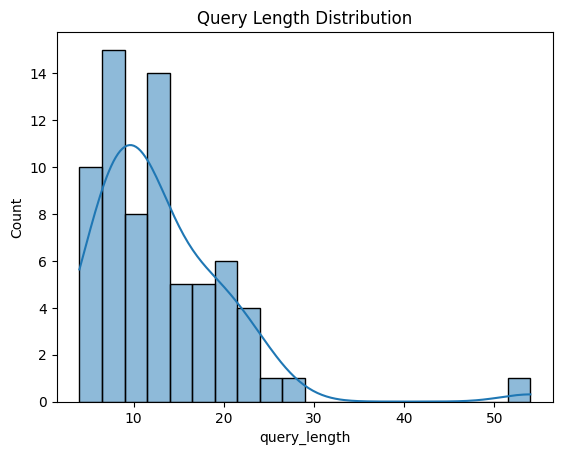

In [13]:
df['query_length'] = df['query'].apply(lambda x: len(x.split()))
df['question_length'] = df['question'].apply(lambda x: len(x.split()))

sns.histplot(df['query_length'], bins=20, kde=True)
plt.title("Query Length Distribution")
plt.show()


In [14]:
df.head(1)

,db_id,query,question,query_toks,query_toks_no_value,question_toks,query_length,question_length
0,department_management,SELECT count(*) FROM head WHERE age > 56,How many heads of the departments are older th...,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...","[How, many, heads, of, the, departments, are, ...",8,11


In [16]:
print("Missing values per column:")
print(df.isna().sum())



Missing values per column:
db_id                  0
query                  0
question               0
query_toks             0
query_toks_no_value    0
question_toks          0
query_length           0
question_length        0
dtype: int64


## Using the Local Spider Dataset

The Spider dataset has now been downloaded locally in the `data/` folder.  
We can load it from this location without re-downloading.


# Dataset Overview

### Number of Samples
- **Training set:** 7,000  
- **Validation set:** 1,034  

### Missing Values
- No missing values in either training or validation sets.

### Unique Databases
- **Training set:** 140  
- **Validation set:** 20  

### Validation Databases Not in Training Set
- **Count:** 20  

In [22]:
import os
DATA_DIR = os.path.join("data")

train_dataset = load_dataset("spider", split="train", cache_dir=DATA_DIR)
val_dataset = load_dataset("spider", split="validation", cache_dir=DATA_DIR)

# Convert to Pandas DataFrames for easier comparison
df_train = pd.DataFrame(train_dataset)
df_val = pd.DataFrame(val_dataset)

# Quick look at each
print("Training data:")
print(df_train.head(1))
print("Validation data:")
print(df_val.head(1))



Training data:
                   db_id                                       query  \
0  department_management  SELECT count(*) FROM head WHERE age  >  56   

                                            question  \
0  How many heads of the departments are older th...   

                                          query_toks  \
0  [SELECT, count, (, *, ), FROM, head, WHERE, ag...   

                                 query_toks_no_value  \
0  [select, count, (, *, ), from, head, where, ag...   

                                       question_toks  
0  [How, many, heads, of, the, departments, are, ...  
Validation data:
            db_id                        query                      question  \
0  concert_singer  SELECT count(*) FROM singer  How many singers do we have?   

                               query_toks  \
0  [SELECT, count, (, *, ), FROM, singer]   

                      query_toks_no_value  \
0  [select, count, (, *, ), from, singer]   

                           ques

In [29]:
# Check sizes
print(f"Number of training samples: {len(df_train)}")
print(f"Number of validation samples: {len(df_val)}")

print("Missing values per column:")
print("Train:")
print(df_train.isna().sum())
print("\nValidation:")
print(df_val.isna().sum())


Number of training samples: 7000
Number of validation samples: 1034
Missing values per column:
Train:
db_id                  0
query                  0
question               0
query_toks             0
query_toks_no_value    0
question_toks          0
dtype: int64

Validation:
db_id                  0
query                  0
question               0
query_toks             0
query_toks_no_value    0
question_toks          0
dtype: int64


In [26]:
# Unique databases in train and validation
train_dbs = df_train['db_id'].unique()
val_dbs = df_val['db_id'].unique()

print("All training databases:", list(train_dbs))
print("Databases in validation set:", list(val_dbs))

# Count of unique databases
print(f"Number of unique databases in training: {len(train_dbs)}")
print(f"Number of unique databases in validation: {len(val_dbs)}")


All training databases: ['department_management', 'farm', 'student_assessment', 'bike_1', 'book_2', 'musical', 'twitter_1', 'product_catalog', 'flight_1', 'allergy_1', 'store_1', 'journal_committee', 'customers_card_transactions', 'race_track', 'coffee_shop', 'chinook_1', 'insurance_fnol', 'medicine_enzyme_interaction', 'university_basketball', 'phone_1', 'match_season', 'climbing', 'body_builder', 'election_representative', 'apartment_rentals', 'game_injury', 'soccer_1', 'performance_attendance', 'college_2', 'debate', 'insurance_and_eClaims', 'customers_and_invoices', 'wedding', 'theme_gallery', 'epinions_1', 'riding_club', 'gymnast', 'small_bank_1', 'browser_web', 'wrestler', 'school_finance', 'protein_institute', 'cinema', 'products_for_hire', 'phone_market', 'gas_company', 'party_people', 'pilot_record', 'cre_Doc_Control_Systems', 'company_1', 'local_govt_in_alabama', 'formula_1', 'machine_repair', 'entrepreneur', 'perpetrator', 'csu_1', 'candidate_poll', 'movie_1', 'county_public

In [28]:
# Databases in validation not in training
val_not_in_train = [db for db in val_dbs if db not in train_dbs]

print("Number of validation databases not in training:", len(val_not_in_train))
print("These databases are:", val_not_in_train)


Number of validation databases not in training: 20
These databases are: ['concert_singer', 'pets_1', 'car_1', 'flight_2', 'employee_hire_evaluation', 'cre_Doc_Template_Mgt', 'course_teach', 'museum_visit', 'wta_1', 'battle_death', 'student_transcripts_tracking', 'tvshow', 'poker_player', 'voter_1', 'world_1', 'orchestra', 'network_1', 'dog_kennels', 'singer', 'real_estate_properties']


In [30]:
row = df_train.iloc[0]  
phrase = row['question']
query = row['query']

print("Phrase:", phrase)
print("Query:", query)

Phrase: How many heads of the departments are older than 56 ?
Query: SELECT count(*) FROM head WHERE age  >  56
